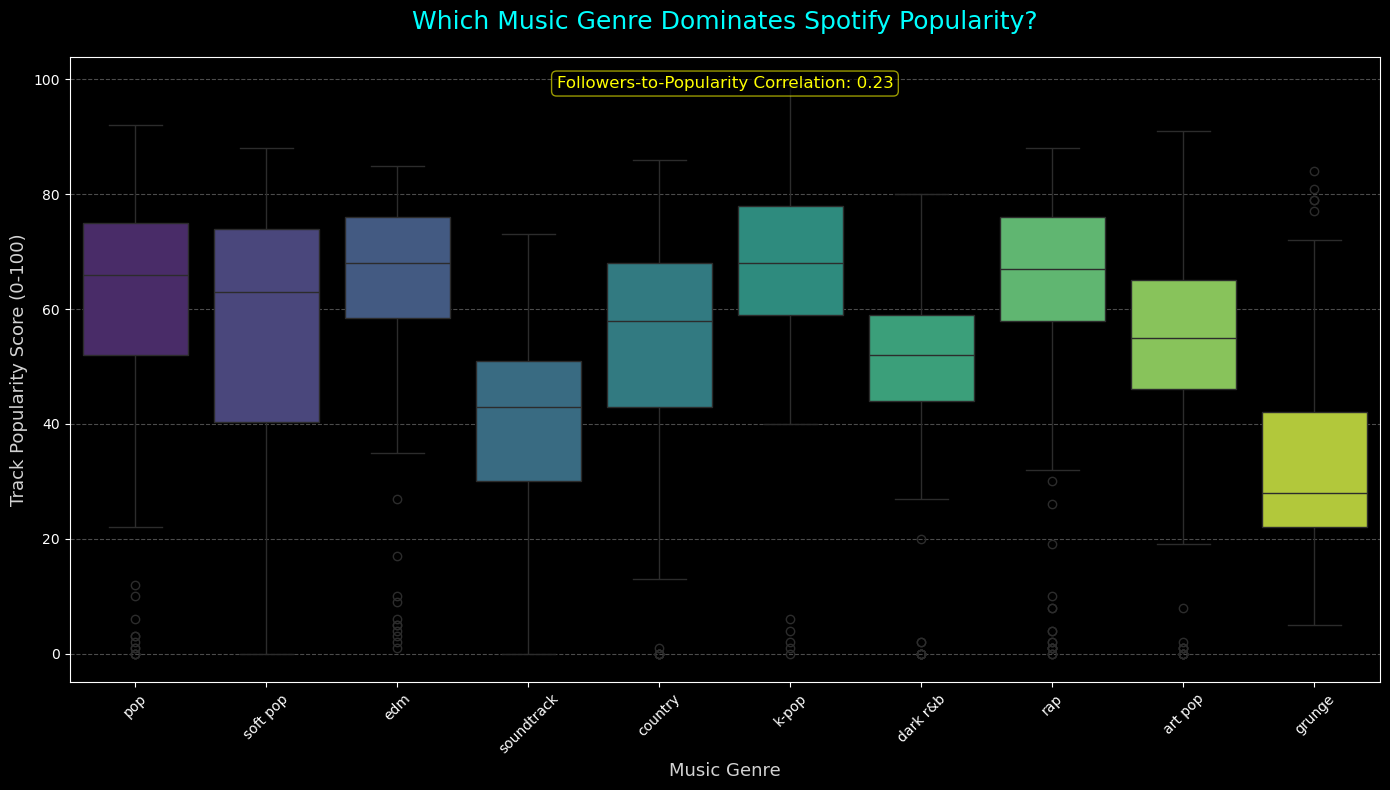

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv('track_data_final.csv')
df['primary_genre'] = df['artist_genres'].apply(lambda x: eval(x)[0] if pd.notnull(x) and '[' in x and len(eval(x)) > 0 else 'Unknown')

# Styling
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 8))

# Filter for top 10 genres
top_10_genres = df[df['primary_genre'] != 'Unknown']['primary_genre'].value_counts().head(10).index
df_top_genres = df[df['primary_genre'].isin(top_10_genres)]

# Visualization 1: Genre Popularity
sns.boxplot(data=df_top_genres, x='primary_genre', y='track_popularity', 
            palette='viridis', hue='primary_genre', legend=False)

plt.title('Which Music Genre Dominates Spotify Popularity?', fontsize=18, color='cyan', pad=20)
plt.xlabel('Music Genre', fontsize=13, color='lightgray')
plt.ylabel('Track Popularity Score (0-100)', fontsize=13, color='lightgray')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Correlation Annotation
correlation = df['artist_followers'].corr(df['track_popularity'])
plt.annotate(f'Followers-to-Popularity Correlation: {correlation:.2f}', 
             xy=(0.5, 0.95), xycoords='axes fraction', 
             ha='center', fontsize=12, color='yellow', 
             bbox=dict(boxstyle="round", fc="black", ec="yellow", alpha=0.6))

plt.tight_layout()
plt.show()

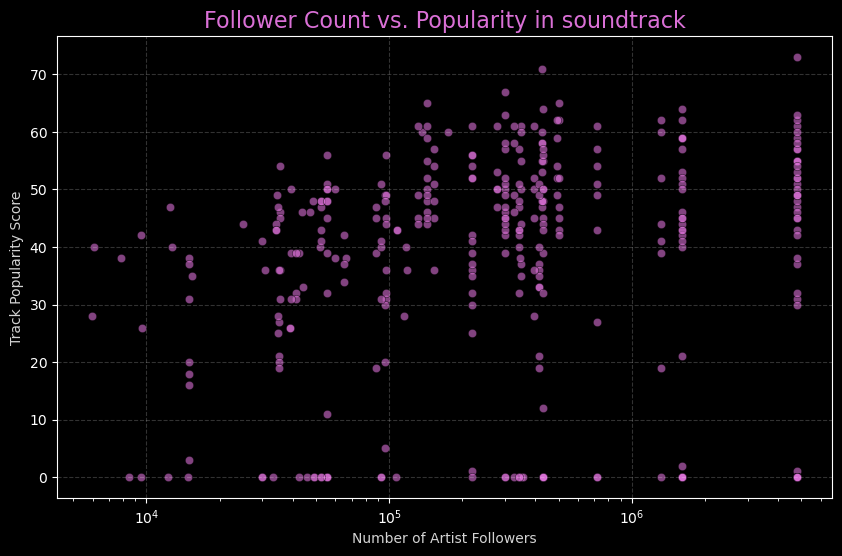

In [20]:
# Identify the top genre name
top_genre_name = top_10_genres[0] 

# Filter the data for JUST that one top genre
df_genre_focus = df[df['primary_genre'] == top_genre_name]

# I start Creating a Deep Dive on Followers vs Popularity
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_genre_focus, 
    x='artist_followers', 
    y='track_popularity', 
    alpha=0.6, 
    color='orchid',
    edgecolor='black'
)

plt.title(f'Follower Count vs. Popularity in {top_genre_name}', fontsize=16, color='orchid')
plt.xlabel('Number of Artist Followers', color='lightgray')
plt.ylabel('Track Popularity Score', color='lightgray')
plt.xscale('log') # Followers vary wildly, so the log scale makes it easier to see
plt.grid(linestyle='--', alpha=0.2)

plt.show()

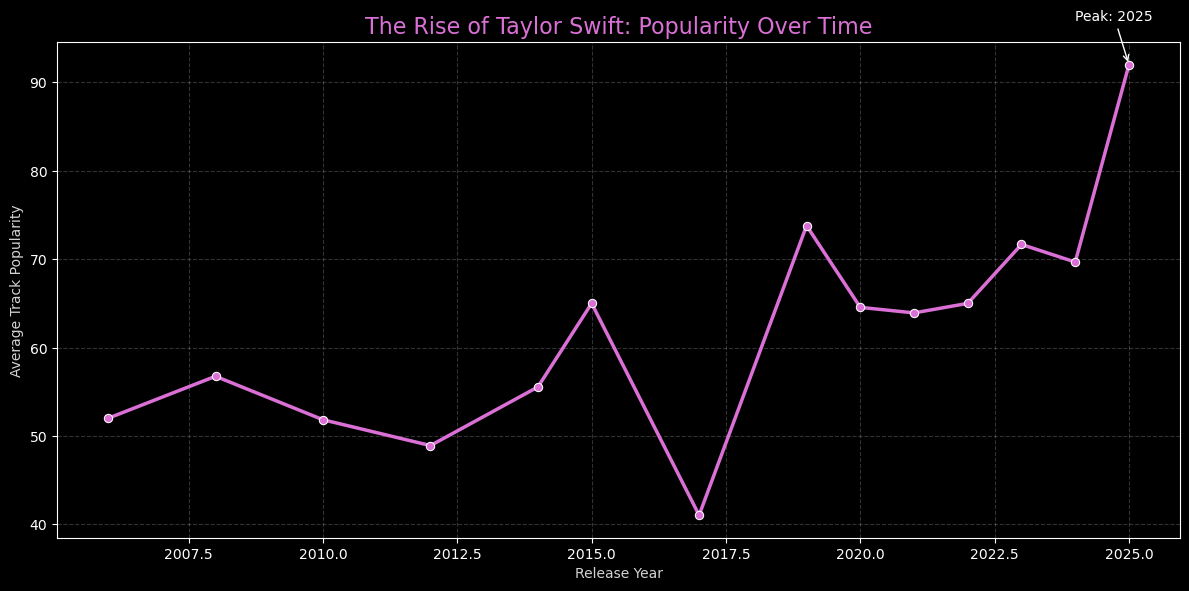

In [15]:
# I Choose Taylor Swift as my favorite artist
favorite_artist = "Taylor Swift" 

# Extract the year and filter
# I used brackets ['album_release_date'] because of the under scores in the name
df['release_year'] = pd.to_datetime(df['album_release_date'], errors='coerce').dt.year

# Filter for my favorite artist
artist_history = df[df['artist_name'].str.contains(favorite_artist, case=False, na=False)]

# Group by year and calculate average popularity
artist_history = artist_history.groupby('release_year')['track_popularity'].mean().reset_index()

# Create the Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=artist_history, x='release_year', y='track_popularity', 
             marker='o', color='orchid', linewidth=2.5)

plt.title(f'The Rise of {favorite_artist}: Popularity Over Time', fontsize=16, color='orchid')
plt.xlabel('Release Year', color='lightgray')
plt.ylabel('Average Track Popularity', color='lightgray')
plt.grid(axis='both', linestyle='--', alpha=0.2)

# Add peak annotation if data exists
if not artist_history.empty:
    peak_row = artist_history.loc[artist_history['track_popularity'].idxmax()]
    plt.annotate(f'Peak: {int(peak_row["release_year"])}', 
                 xy=(peak_row["release_year"], peak_row["track_popularity"]), 
                 xytext=(peak_row["release_year"]-1, peak_row["track_popularity"]+5),
                 arrowprops=dict(facecolor='white', arrowstyle='->'),
                 color='white')

plt.tight_layout()
plt.show()